In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 1. Implementación
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [79]:
n_trace = 5000

def inferencia_moneda(alfa, beta, n=6, obs=6):
    with pm.Model() as modelo:
        theta = pm.Beta('theta', alpha=alfa, beta=beta)
        coin_obs = pm.Binomial('co', n=n, p=theta, observed=obs)

        start = pm.find_MAP(model=modelo)
        step = pm.Metropolis()
        trace = pm.sample(n_trace, step, start)
    
    plt.clf()
    plt.hist(trace['theta'], 30, histtype='step', normed=True, label='post');
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alfa, beta), label='prior');
    plt.legend(loc='best');
    plt.show()
    
    return (pm.find_MAP(model=modelo), trace)

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1434.71it/s]  
100%|██████████| 5500/5500 [00:01<00:00, 3524.16it/s]


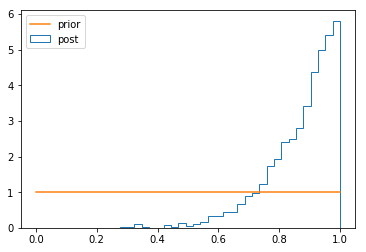

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 759.45it/s]  
logp = -0.58355, ||grad|| = 3: 100%|██████████| 5/5 [00:00<00:00, 983.84it/s]
100%|██████████| 5500/5500 [00:01<00:00, 4316.44it/s]


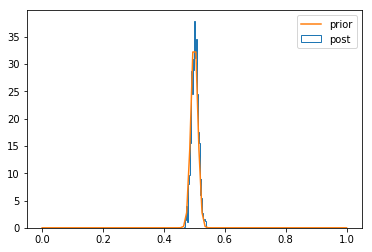

logp = -0.58355, ||grad|| = 3: 100%|██████████| 5/5 [00:00<00:00, 773.14it/s]


In [80]:
(map_1_1, trace_1_1) = inferencia_moneda(1,1)
(map_1000_1000, trace_1000_1000) = inferencia_moneda(1000,1000)

# 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

Máximo a posteriori para prior Beta(1, 1): 0.999998462083
Posterior para prior Beta(1, 1)


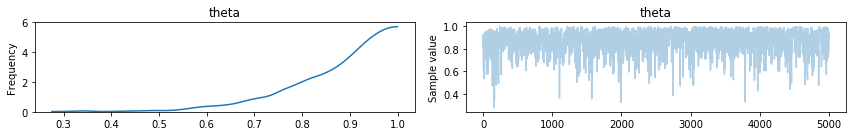



Máximo a posteriori para prior Beta(1000, 1000): 0.501497005702
Posterior para prior Beta(1000, 1000)


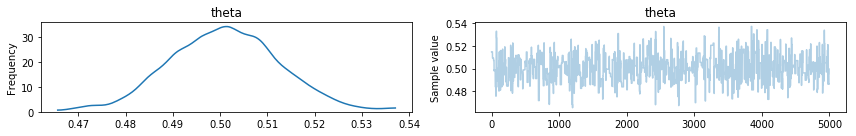

In [81]:
plt.clf()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])
print "Posterior para prior Beta(1, 1)"
pm.traceplot(trace_1_1)
plt.show()

print "\n\nMáximo a posteriori para prior Beta(1000, 1000): {}".format(map_1000_1000['theta'])
print "Posterior para prior Beta(1000, 1000)"
pm.traceplot(trace_1000_1000)
plt.show()

### Estimando la media de las posteriors

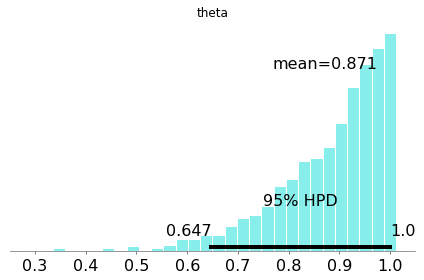

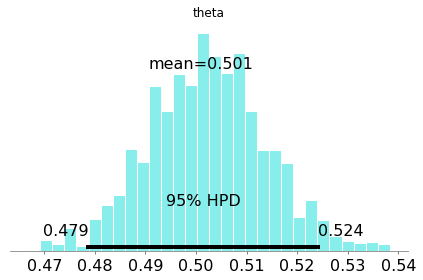

In [85]:
pm.plot_posterior(trace_1_1, color='#87eeeb', point_estimate='mean')
plt.show()

pm.plot_posterior(trace_1000_1000, color='#87eeeb', point_estimate='mean')
plt.show()

# 3. Predicción
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

# 4. Otros datos
Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en
la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en
general?

# 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.